## 字体表
Matplotlib的字体支持是由FreeType库提供的。
在这里，我们使用table绘制一个表，通过Unicode代码点显示符号。为简洁起见，该表只包含前256个符号。
该示例是一个完整的工作脚本。您可以下载它并使用它通过运行来研究字体

In [1]:
python font_table.py /path/to/font/file

SyntaxError: invalid syntax (<ipython-input-1-e99c568e0284>, line 1)

In [2]:
import os
from pathlib import Path
import unicodedata

import matplotlib.font_manager as fm
from matplotlib.ft2font import FT2Font
import matplotlib.pyplot as plt


def print_glyphs(path):
    """
    Print the all glyphs in the given font file to stdout.

    Parameters
    ----------
    path : str or None
        The path to the font file.  If None, use Matplotlib's default font.
    """
    if path is None:
        path = fm.findfont(fm.FontProperties())  # The default font.

    font = FT2Font(path)

    charmap = font.get_charmap()
    max_indices_len = len(str(max(charmap.values())))

    print("The font face contains the following glyphs:")
    for char_code, glyph_index in charmap.items():
        char = chr(char_code)
        name = unicodedata.name(
                char,
                f"{char_code:#x} ({font.get_glyph_name(glyph_index)})")
        print(f"{glyph_index:>{max_indices_len}} {char} {name}")


def draw_font_table(path):
    """
    Draw a font table of the first 255 chars of the given font.

    Parameters
    ----------
    path : str or None
        The path to the font file.  If None, use Matplotlib's default font.
    """
    if path is None:
        path = fm.findfont(fm.FontProperties())  # The default font.

    font = FT2Font(path)
    # A charmap is a mapping of "character codes" (in the sense of a character
    # encoding, e.g. latin-1) to glyph indices (i.e. the internal storage table
    # of the font face).
    # In FreeType>=2.1, a Unicode charmap (i.e. mapping Unicode codepoints)
    # is selected by default.  Moreover, recent versions of FreeType will
    # automatically synthesize such a charmap if the font does not include one
    # (this behavior depends on the font format; for example it is present
    # since FreeType 2.0 for Type 1 fonts but only since FreeType 2.8 for
    # TrueType (actually, SFNT) fonts).
    # The code below (specifically, the ``chr(char_code)`` call) assumes that
    # we have indeed selected a Unicode charmap.
    codes = font.get_charmap().items()

    labelc = ["{:X}".format(i) for i in range(16)]
    labelr = ["{:02X}".format(16 * i) for i in range(16)]
    chars = [["" for c in range(16)] for r in range(16)]

    for char_code, glyph_index in codes:
        if char_code >= 256:
            continue
        row, col = divmod(char_code, 16)
        chars[row][col] = chr(char_code)

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_title(os.path.basename(path))
    ax.set_axis_off()

    table = ax.table(
        cellText=chars,
        rowLabels=labelr,
        colLabels=labelc,
        rowColours=["palegreen"] * 16,
        colColours=["palegreen"] * 16,
        cellColours=[[".95" for c in range(16)] for r in range(16)],
        cellLoc='center',
        loc='upper left',
    )
    for key, cell in table.get_celld().items():
        row, col = key
        if row > 0 and col > -1:  # Beware of table's idiosyncratic indexing...
            cell.set_text_props(font=Path(path))

    fig.tight_layout()
    plt.show()


if __name__ == "__main__":
    from argparse import ArgumentParser

    parser = ArgumentParser(description="Display a font table.")
    parser.add_argument("path", nargs="?", help="Path to the font file.")
    parser.add_argument("--print-all", action="store_true",
                        help="Additionally, print all chars to stdout.")
    args = parser.parse_args()

    if args.print_all:
        print_glyphs(args.path)
    draw_font_table(args.path)

usage: ipykernel_launcher.py [-h] [--print-all] [path]
ipykernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2

D:\anaconda3\envs\py38\lib\site-packages\IPython\core\interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## 字体演示(kwargs)
使用kwargs设置字体属性。
请参阅Fonts demo (object-oriented style)来使用setter实现同样的效果。

In [4]:
import matplotlib.pyplot as plt

alignment = {'horizontalalignment': 'center', 'verticalalignment': 'baseline'}

# Show family options

families = ['serif', 'sans-serif', 'cursive', 'fantasy', 'monospace']

t = plt.figtext(0.1, 0.9, 'family', size='large', **alignment)

yp = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

for k, family in enumerate(families):
    t = plt.figtext(0.1, yp[k], family, family=family, **alignment)

# Show style options

styles = ['normal', 'italic', 'oblique']

t = plt.figtext(0.3, 0.9, 'style', **alignment)

for k, style in enumerate(styles):
    t = plt.figtext(0.3, yp[k], style, family='sans-serif', style=style,
                    **alignment)

# Show variant options

variants = ['normal', 'small-caps']

t = plt.figtext(0.5, 0.9, 'variant', **alignment)

for k, variant in enumerate(variants):
    t = plt.figtext(0.5, yp[k], variant, family='serif', variant=variant,
                    **alignment)

# Show weight options

weights = ['light', 'normal', 'medium', 'semibold', 'bold', 'heavy', 'black']

t = plt.figtext(0.7, 0.9, 'weight', **alignment)

for k, weight in enumerate(weights):
    t = plt.figtext(0.7, yp[k], weight, weight=weight, **alignment)

# Show size options

sizes = ['xx-small', 'x-small', 'small', 'medium', 'large',
         'x-large', 'xx-large']

t = plt.figtext(0.9, 0.9, 'size', **alignment)

for k, size in enumerate(sizes):
    t = plt.figtext(0.9, yp[k], size, size=size, **alignment)

# Show bold italic
t = plt.figtext(0.3, 0.1, 'bold italic', style='italic',
                weight='bold', size='x-small',
                **alignment)
t = plt.figtext(0.3, 0.2, 'bold italic',
                style='italic', weight='bold', size='medium',
                **alignment)
t = plt.figtext(0.3, 0.3, 'bold italic',
                style='italic', weight='bold', size='x-large',
                **alignment)

plt.show()

<Figure size 432x288 with 0 Axes>

0 $W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} \int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$
1 $\alpha_i > \beta_i,\ \alpha_{i+1}^j = {\rm sin}(2\pi f_j t_i) e^{-5 t_i/\tau},\ \ldots$
2 $\frac{3}{4},\ \binom{3}{4},\ \genfrac{}{}{0}{}{3}{4},\ \left(\frac{5 - \frac{1}{x}}{4}\right),\ \ldots$
3 $\sqrt{2},\ \sqrt[3]{x},\ \ldots$
4 $\mathrm{Roman}\ , \ \mathit{Italic}\ , \ \mathtt{Typewriter} \ \mathrm{or}\ \mathcal{CALLIGRAPHY}$
5 $\acute a,\ \bar a,\ \breve a,\ \dot a,\ \ddot a, \ \grave a, \ \hat a,\ \tilde a,\ \vec a,\ \widehat{xyz},\ \widetilde{xyz},\ \ldots$
6 $\alpha,\ \beta,\ \chi,\ \delta,\ \lambda,\ \mu,\ \Delta,\ \Gamma,\ \Omega,\ \Phi,\ \Pi,\ \Upsilon,\ \nabla,\ \aleph,\ \beth,\ \daleth,\ \gimel,\ \ldots$
7 $\coprod,\ \int,\ \oint,\ \prod,\ \sum,\ \log,\ \sin,\ \approx,\ \oplus,\ \star,\ \varpropto,\ \infty,\ 

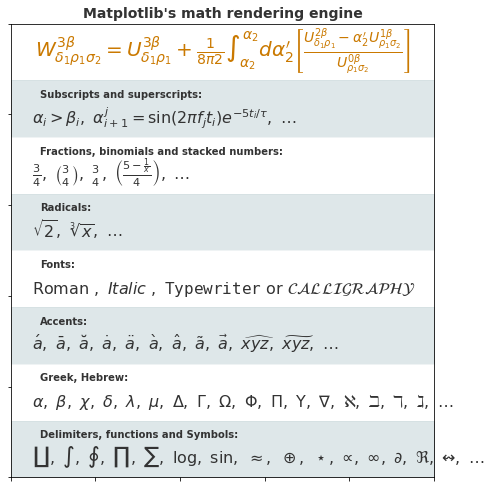

In [5]:
import matplotlib.pyplot as plt
import subprocess
import sys
import re

# Selection of features following "Writing mathematical expressions" tutorial
mathtext_titles = {
    0: "Header demo",
    1: "Subscripts and superscripts",
    2: "Fractions, binomials and stacked numbers",
    3: "Radicals",
    4: "Fonts",
    5: "Accents",
    6: "Greek, Hebrew",
    7: "Delimiters, functions and Symbols"}
n_lines = len(mathtext_titles)

# Randomly picked examples
mathext_demos = {
    0: r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = "
    r"U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} "
    r"\int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ "
    r"U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_"
    r"{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$",

    1: r"$\alpha_i > \beta_i,\ "
    r"\alpha_{i+1}^j = {\rm sin}(2\pi f_j t_i) e^{-5 t_i/\tau},\ "
    r"\ldots$",

    2: r"$\frac{3}{4},\ \binom{3}{4},\ \genfrac{}{}{0}{}{3}{4},\ "
    r"\left(\frac{5 - \frac{1}{x}}{4}\right),\ \ldots$",

    3: r"$\sqrt{2},\ \sqrt[3]{x},\ \ldots$",

    4: r"$\mathrm{Roman}\ , \ \mathit{Italic}\ , \ \mathtt{Typewriter} \ "
    r"\mathrm{or}\ \mathcal{CALLIGRAPHY}$",

    5: r"$\acute a,\ \bar a,\ \breve a,\ \dot a,\ \ddot a, \ \grave a, \ "
    r"\hat a,\ \tilde a,\ \vec a,\ \widehat{xyz},\ \widetilde{xyz},\ "
    r"\ldots$",

    6: r"$\alpha,\ \beta,\ \chi,\ \delta,\ \lambda,\ \mu,\ "
    r"\Delta,\ \Gamma,\ \Omega,\ \Phi,\ \Pi,\ \Upsilon,\ \nabla,\ "
    r"\aleph,\ \beth,\ \daleth,\ \gimel,\ \ldots$",

    7: r"$\coprod,\ \int,\ \oint,\ \prod,\ \sum,\ "
    r"\log,\ \sin,\ \approx,\ \oplus,\ \star,\ \varpropto,\ "
    r"\infty,\ \partial,\ \Re,\ \leftrightsquigarrow, \ \ldots$"}


def doall():
    # Colors used in Matplotlib online documentation.
    mpl_blue_rvb = (191. / 255., 209. / 256., 212. / 255.)
    mpl_orange_rvb = (202. / 255., 121. / 256., 0. / 255.)
    mpl_grey_rvb = (51. / 255., 51. / 255., 51. / 255.)

    # Creating figure and axis.
    plt.figure(figsize=(6, 7))
    plt.axes([0.01, 0.01, 0.98, 0.90], facecolor="white", frameon=True)
    plt.gca().set_xlim(0., 1.)
    plt.gca().set_ylim(0., 1.)
    plt.gca().set_title("Matplotlib's math rendering engine",
                        color=mpl_grey_rvb, fontsize=14, weight='bold')
    plt.gca().set_xticklabels("", visible=False)
    plt.gca().set_yticklabels("", visible=False)

    # Gap between lines in axes coords
    line_axesfrac = 1 / n_lines

    # Plotting header demonstration formula
    full_demo = mathext_demos[0]
    plt.annotate(full_demo,
                 xy=(0.5, 1. - 0.59 * line_axesfrac),
                 color=mpl_orange_rvb, ha='center', fontsize=20)

    # Plotting features demonstration formulae
    for i_line in range(1, n_lines):
        baseline = 1 - i_line * line_axesfrac
        baseline_next = baseline - line_axesfrac
        title = mathtext_titles[i_line] + ":"
        fill_color = ['white', mpl_blue_rvb][i_line % 2]
        plt.fill_between([0., 1.], [baseline, baseline],
                         [baseline_next, baseline_next],
                         color=fill_color, alpha=0.5)
        plt.annotate(title,
                     xy=(0.07, baseline - 0.3 * line_axesfrac),
                     color=mpl_grey_rvb, weight='bold')
        demo = mathext_demos[i_line]
        plt.annotate(demo,
                     xy=(0.05, baseline - 0.75 * line_axesfrac),
                     color=mpl_grey_rvb, fontsize=16)

    for i in range(n_lines):
        s = mathext_demos[i]
        print(i, s)
    plt.show()


if '--latex' in sys.argv:
    # Run: python mathtext_examples.py --latex
    # Need amsmath and amssymb packages.
    fd = open("mathtext_examples.ltx", "w")
    fd.write("\\documentclass{article}\n")
    fd.write("\\usepackage{amsmath, amssymb}\n")
    fd.write("\\begin{document}\n")
    fd.write("\\begin{enumerate}\n")

    for i in range(n_lines):
        s = mathext_demos[i]
        s = re.sub(r"(?<!\\)\$", "$$", s)
        fd.write("\\item %s\n" % s)

    fd.write("\\end{enumerate}\n")
    fd.write("\\end{document}\n")
    fd.close()

    subprocess.call(["pdflatex", "mathtext_examples.ltx"])
else:
    doall()

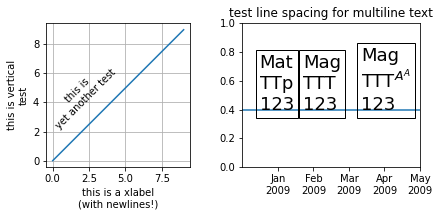

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7, 4))
ax = plt.subplot(121)
ax.set_aspect(1)
plt.plot(np.arange(10))
plt.xlabel('this is a xlabel\n(with newlines!)')
plt.ylabel('this is vertical\ntest', multialignment='center')
plt.text(2, 7, 'this is\nyet another test',
         rotation=45,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')

plt.grid(True)

plt.subplot(122)

plt.text(0.29, 0.4, "Mat\nTTp\n123", size=18,
         va="baseline", ha="right", multialignment="left",
         bbox=dict(fc="none"))

plt.text(0.34, 0.4, "Mag\nTTT\n123", size=18,
         va="baseline", ha="left", multialignment="left",
         bbox=dict(fc="none"))

plt.text(0.95, 0.4, "Mag\nTTT$^{A^A}$\n123", size=18,
         va="baseline", ha="right", multialignment="left",
         bbox=dict(fc="none"))

plt.xticks([0.2, 0.4, 0.6, 0.8, 1.],
           ["Jan\n2009", "Feb\n2009", "Mar\n2009", "Apr\n2009", "May\n2009"])

plt.axhline(0.4)
plt.title("test line spacing for multiline text")

plt.subplots_adjust(bottom=0.25, top=0.75)
plt.show()

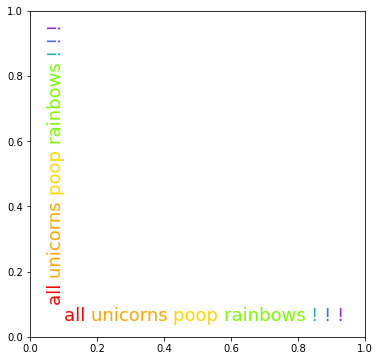

In [7]:
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D


def rainbow_text(x, y, strings, colors, orientation='horizontal',
                 ax=None, **kwargs):
    """
    Take a list of *strings* and *colors* and place them next to each
    other, with text strings[i] being shown in colors[i].

    Parameters
    ----------
    x, y : float
        Text position in data coordinates.
    strings : list of str
        The strings to draw.
    colors : list of color
        The colors to use.
    orientation : {'horizontal', 'vertical'}
    ax : Axes, optional
        The Axes to draw into. If None, the current axes will be used.
    **kwargs
        All other keyword arguments are passed to plt.text(), so you can
        set the font size, family, etc.
    """
    if ax is None:
        ax = plt.gca()
    t = ax.transData
    canvas = ax.figure.canvas

    assert orientation in ['horizontal', 'vertical']
    if orientation == 'vertical':
        kwargs.update(rotation=90, verticalalignment='bottom')

    for s, c in zip(strings, colors):
        text = ax.text(x, y, s + " ", color=c, transform=t, **kwargs)

        # Need to draw to update the text position.
        text.draw(canvas.get_renderer())
        ex = text.get_window_extent()
        if orientation == 'horizontal':
            t = text.get_transform() + Affine2D().translate(ex.width, 0)
        else:
            t = text.get_transform() + Affine2D().translate(0, ex.height)


words = "all unicorns poop rainbows ! ! !".split()
colors = ['red', 'orange', 'gold', 'lawngreen', 'lightseagreen', 'royalblue',
          'blueviolet']
plt.figure(figsize=(6, 6))
rainbow_text(0.1, 0.05, words, colors, size=18)
rainbow_text(0.05, 0.1, words, colors, orientation='vertical', size=18)

plt.show()

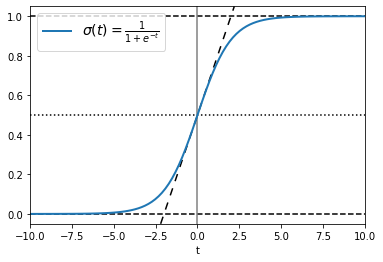

In [8]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))

plt.axhline(y=0, color="black", linestyle="--")
plt.axhline(y=0.5, color="black", linestyle=":")
plt.axhline(y=1.0, color="black", linestyle="--")
plt.axvline(color="grey")
plt.axline((0, 0.5), slope=0.25, color="black", linestyle=(0, (5, 5)))
plt.plot(t, sig, linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlim(-10, 10)
plt.xlabel("t")
plt.legend(fontsize=14)
plt.show()